# Recommender Systems

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
columns_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names = columns_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [22]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [23]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [25]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
ratings['Number of Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


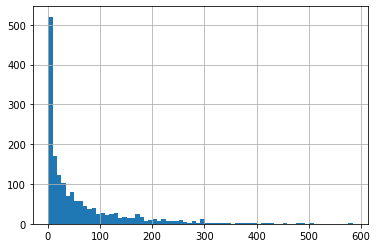

In [28]:
ratings['Number of Ratings'].hist(bins=70)

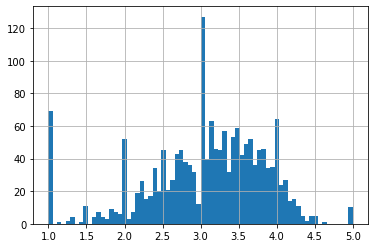

In [29]:
ratings['rating'].hist(bins=70)

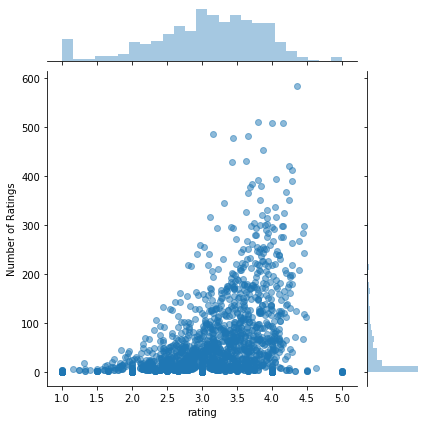

In [30]:
sns.jointplot(x='rating',y='Number of Ratings',data=ratings,alpha=.5)

In [31]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [32]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [33]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [35]:
similar_to_sw = moviemat.corrwith(starwars_user_ratings)
similar_to_ll = moviemat.corrwith(liarliar_user_ratings)

In [42]:
corr_sw = pd.DataFrame(similar_to_sw,columns=['Correlation'])
corr_sw.dropna(inplace=True)
corr_sw.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Filter out movies based on review count

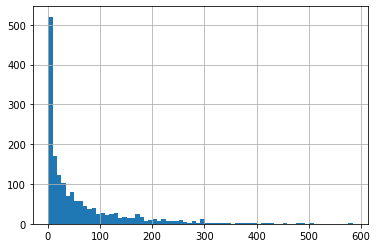

In [39]:
ratings['Number of Ratings'].hist(bins=70)

In [43]:
corr_sw = corr_sw.join(ratings['Number of Ratings'])
corr_sw.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [46]:
filtered_corr_sw=corr_sw[corr_sw['Number of Ratings']>100]
filtered_corr_sw.head()

,Correlation,Number of Ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151


In [51]:
corr_ll = pd.DataFrame(similar_to_ll,columns=['Correlation'])
corr_ll.dropna(inplace=True)
corr_ll = corr_ll.join(ratings['Number of Ratings'])
corr_ll=corr_ll[corr_ll['Number of Ratings']>100].sort_values('Correlation',
                                                     ascending=False)
corr_ll.head()

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
